In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean   # conda install scipy
from statsmodels import robust     
 # conda install -c conda-forge statsmodels 
import wquantiles                   # pip install wquantiles

import seaborn as sns
import matplotlib.pylab as plt

import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect

# DF de cada una de las tablas Diamantes

In [2]:
city = pd.read_csv('./data/diamonds_city_202208201411.csv')
city.head()





,city_id,city
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam
1,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich
2,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas
3,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,New York City
4,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,Paris


In [4]:
clarity = pd.read_csv('./data/diamonds_clarity_202208201414.csv')
clarity.head(),
#clarity.shape (8,2)

(                                          clarity_id clarity
 0  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2
 1  3f9db06236e9719b61c826b612b882fa702ec81574e44c...    VVS2
 2  66686ae1f0c9c400ba32dc600a34ff0aa173395bcbc2d8...    VVS1
 3  7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...      IF
 4  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...     SI1,)

In [5]:
color = pd.read_csv('./data/diamonds_color_202208201415.csv')
color.head()


,color_id,color
0,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G
1,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D
2,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H
3,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J
4,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,I


In [6]:
cut = pd.read_csv('./data/diamonds_cut_202208201415.csv')
cut
#cut.shape

,cut_id,cut
0,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good
1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,Ideal
2,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,Good
3,de88c121a82a06352bf1aaceba20578356408a334ba046...,Premium
4,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,Fair


In [7]:
# Cargamos csv
dimensions = pd.read_csv('./data/diamonds_dimensions_202208201416.csv')
dimensions

,index_id,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95
...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76


In [8]:
# Obtenemos df propierties
propierties = pd.read_csv('./data/diamonds_properties_202208201416.csv')
propierties

,index_id,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...


In [9]:
# Obtenemos df transactional
transactional = pd.read_csv('./data/diamonds_transactional_202208201417.csv')
transactional 

,index_id,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,1.34
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,2.02
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,1.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,0.33


# Union claves con index

In [10]:
index_city = pd.merge(city,transactional)
index_city

,city_id,city,index_id,price,carat
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,5f9c4ab08cac7457e9111a30e4664920607ea2c115a143...,6216,1.00
1,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da5760...,4969,1.16
2,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,86e50149658661312a9e0b35558d84f6c6d3da797f552a...,2422,0.70
3,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,3d914f9348c9cc0ff8a79716700b9fcd4d2f3e71160800...,3861,1.04
4,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,8722616204217eddb39e7df969e0698aed8e599ba62ed2...,2440,0.78
...,...,...,...,...,...
40450,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,6a4490713063ded3aad43f37c39037f1884a12813910ca...,7840,1.50
40451,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,eb1bc92524487e990af750137fa20dab6ae30ebb315ecf...,1058,0.39
40452,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,c6f09db9685f34691490390033c37b1bd7b13a7c6a4d48...,17392,2.02
40453,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,78b20395c3a5ff8777fb523373d519e5fede4917f1b175...,1436,0.50


In [11]:
index_clarity = pd.merge(clarity,propierties)
index_clarity

,clarity_id,clarity,index_id,cut_id,color_id
0,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...
1,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,6b51d431df5d7f141cbececcf79edf3dd861c3b4069f0b...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...
2,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,8527a891e224136950ff32ca212b45bc93f69fbb801c3b...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...
3,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,e629fa6598d732768f7c726b4b621285f9c3b85303900a...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...
4,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e47...,de88c121a82a06352bf1aaceba20578356408a334ba046...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...
...,...,...,...,...,...
40450,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,dff43fac32be7cf4e2b5b60e653ec93e0e7b58288c2374...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...
40451,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,eb1d3d46da28f32f5010b2a104daf121756823531432a2...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0...
40452,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,2a1ff30ab693f59dea389a4b12b3de2a14bcbd09aa65e3...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...
40453,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,26d37ebd9c73cad94e7c323e382e96cf3c3826c73d0c3c...,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...


In [12]:
x = pd.merge(index_clarity,index_city)
x

,clarity_id,clarity,index_id,cut_id,color_id,city_id,city,price,carat
0,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas,9057,1.52
1,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,6b51d431df5d7f141cbececcf79edf3dd861c3b4069f0b...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,Tel Aviv,3101,0.93
2,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,8527a891e224136950ff32ca212b45bc93f69fbb801c3b...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,London,10349,1.65
3,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,e629fa6598d732768f7c726b4b621285f9c3b85303900a...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,6006,1.50
4,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e47...,de88c121a82a06352bf1aaceba20578356408a334ba046...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,11078,1.53
...,...,...,...,...,...,...,...,...,...
40450,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,dff43fac32be7cf4e2b5b60e653ec93e0e7b58288c2374...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich,863,0.41
40451,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,eb1d3d46da28f32f5010b2a104daf121756823531432a2...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0...,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,Surat,702,0.32
40452,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,2a1ff30ab693f59dea389a4b12b3de2a14bcbd09aa65e3...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,London,490,0.28
40453,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,26d37ebd9c73cad94e7c323e382e96cf3c3826c73d0c3c...,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,Madrid,9516,1.18


In [13]:
index_color = pd.merge(color,x)
index_color

,color_id,color,clarity_id,clarity,index_id,cut_id,city_id,city,price,carat
0,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,e629fa6598d732768f7c726b4b621285f9c3b85303900a...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,6006,1.50
1,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,6f4b6612125fb3a0daecd2799dfd6c9c299424fd920f9b...,de88c121a82a06352bf1aaceba20578356408a334ba046...,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,1740,0.71
2,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da5760...,de88c121a82a06352bf1aaceba20578356408a334ba046...,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,4969,1.16
3,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,3d914f9348c9cc0ff8a79716700b9fcd4d2f3e71160800...,de88c121a82a06352bf1aaceba20578356408a334ba046...,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,3861,1.04
4,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,1253e9373e781b7500266caa55150e08e210bc8cd8cc70...,de88c121a82a06352bf1aaceba20578356408a334ba046...,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,9664,1.77
...,...,...,...,...,...,...,...,...,...,...
40450,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,d1672b92e93d6c436c478a6913b9134e44b0e6af419bd7...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,1931,0.55
40451,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,b68db4cf881ab5d3df809abe057021f1ca89ec3b0219c5...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,905,0.43
40452,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,78b20395c3a5ff8777fb523373d519e5fede4917f1b175...,de88c121a82a06352bf1aaceba20578356408a334ba046...,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,1436,0.50
40453,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,dff43fac32be7cf4e2b5b60e653ec93e0e7b58288c2374...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich,863,0.41


In [14]:
index_cut=pd.merge(index_color,cut)
index_cut

,color_id,color,clarity_id,clarity,index_id,cut_id,city_id,city,price,carat,cut
0,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,e629fa6598d732768f7c726b4b621285f9c3b85303900a...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,6006,1.50,Good
1,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,27d719c754aacd492a6dc8a1b76619355abcf5ef473cbe...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,3246,0.90,Good
2,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,4099ed5ba70aebc5a9dc26bc2093d4b45839f99b306bd1...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,Surat,1009,0.50,Good
3,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,d74fe97872d8a425b5263add13d51a1066bf0b2cdd5e36...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,Madrid,12929,2.02,Good
4,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,92f3c34650437f1ddf6b2f2e3f4d240e6e3755bace50d4...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,Surat,2363,0.80,Good
...,...,...,...,...,...,...,...,...,...,...,...
40450,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,977c3ac752ffaac24bb4c70be53ab91a064fc7f599e1f7...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,2762,0.70,Fair
40451,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,535cd5e92fb7ab31086e81c3b7bfc8dd3c8c66d3701bae...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp,4536,0.90,Fair
40452,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,8cf04e6840e12f5b900bf21cda5e618b9703f8de83e546...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp,982,0.46,Fair
40453,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,ebf2ca41c95d4740c371e099474fe35a385ba21081bfe9...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,Tel Aviv,816,0.34,Fair


# Unico DF

In [15]:
index_optimo=pd.merge(dimensions,index_cut)
index_optimo

,index_id,depth,table,x,y,z,color_id,color,clarity_id,clarity,cut_id,city_id,city,price,carat,cut
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,de88c121a82a06352bf1aaceba20578356408a334ba046...,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,4268,1.21,Premium
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp,505,0.32,Very Good
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,VS1,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,London,2686,0.71,Fair
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,New York City,738,0.41,Good
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,4882,1.02,Ideal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,VS1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,New York City,10070,1.34,Ideal
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich,12615,2.02,Good
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,Tel Aviv,5457,1.01,Ideal
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,VS1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,Paris,456,0.33,Ideal


# Limpieza DataFrame 

In [16]:
# Quitar columnas repetidas
df_optimo = index_optimo.drop(columns =['city_id','clarity_id','cut_id','color_id'] )
df_optimo

,index_id,depth,table,x,y,z,color,clarity,city,price,carat,cut
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,J,VS2,Kimberly,4268,1.21,Premium
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,H,VS2,Antwerp,505,0.32,Very Good
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,G,VS1,London,2686,0.71,Fair
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,D,SI1,New York City,738,0.41,Good
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,G,SI1,Dubai,4882,1.02,Ideal
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43,G,VS1,New York City,10070,1.34,Ideal
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73,F,SI2,Zurich,12615,2.02,Good
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01,H,SI1,Tel Aviv,5457,1.01,Ideal
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76,J,VS1,Paris,456,0.33,Ideal


In [17]:
df_final=df_optimo[['index_id','depth','table','x','y','z','color','clarity','city','cut','carat','price']]
df_final

,index_id,depth,table,x,y,z,color,clarity,city,cut,carat,price
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,J,VS2,Kimberly,Premium,1.21,4268
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,H,VS2,Antwerp,Very Good,0.32,505
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,G,VS1,London,Fair,0.71,2686
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,D,SI1,New York City,Good,0.41,738
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,G,SI1,Dubai,Ideal,1.02,4882
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43,G,VS1,New York City,Ideal,1.34,10070
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73,F,SI2,Zurich,Good,2.02,12615
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01,H,SI1,Tel Aviv,Ideal,1.01,5457
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76,J,VS1,Paris,Ideal,0.33,456


In [18]:
df_final.to_csv('competi_kaggle.csv', index=False)

# CORRELACION

In [21]:
df_final.corr()

,depth,table,x,y,z,carat,price
depth,1.000000,-0.293114,-0.026348,-0.030966,0.094655,0.026528,-0.014864
table,-0.293114,1.000000,0.196059,0.184673,0.155189,0.183392,0.130111
x,-0.026348,0.196059,1.000000,0.973712,0.984876,0.975688,0.885848
y,-0.030966,0.184673,0.973712,1.000000,0.964828,0.951667,0.866163
z,0.094655,0.155189,0.984876,0.964828,1.000000,0.967570,0.874500
carat,0.026528,0.183392,0.975688,0.951667,0.967570,1.000000,0.921935
price,-0.014864,0.130111,0.885848,0.866163,0.874500,0.921935,1.000000


In [22]:
df_final['cut_category'] = pd.factorize(df_final.cut)[0]
df_final['color_category'] = pd.factorize(df_final.color)[0]
df_final['clarity_category'] = pd.factorize(df_final.clarity)[0]
df_final['city_category'] = pd.factorize(df_final.city)[0]
df_final['volume']= df_final['x'] * df_final['y']*df_final['z']

C:\Users\abarr\AppData\Local\Temp\ipykernel_4600\2420898419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cut_category'] = pd.factorize(df_final.cut)[0]
C:\Users\abarr\AppData\Local\Temp\ipykernel_4600\2420898419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['color_category'] = pd.factorize(df_final.color)[0]
C:\Users\abarr\AppData\Local\Temp\ipykernel_4600\2420898419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [23]:
df_final

,index_id,depth,table,x,y,z,color,clarity,city,cut,carat,price,cut_category,color_category,clarity_category,city_category,volume
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,J,VS2,Kimberly,Premium,1.21,4268,0,0,0,0,197.096725
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,H,VS2,Antwerp,Very Good,0.32,505,1,1,0,1,52.395750
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,G,VS1,London,Fair,0.71,2686,2,2,1,2,113.436890
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,D,SI1,New York City,Good,0.41,738,3,3,2,3,66.268800
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,G,SI1,Dubai,Ideal,1.02,4882,4,2,2,4,168.429975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43,G,VS1,New York City,Ideal,1.34,10070,4,2,1,3,221.429120
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73,F,SI2,Zurich,Good,2.02,12615,3,4,3,7,324.276975
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01,H,SI1,Tel Aviv,Ideal,1.01,5457,4,1,2,8,163.990554
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76,J,VS1,Paris,Ideal,0.33,456,4,0,1,12,54.900540


# EDA - PRECIO

In [24]:
# Precio mínimo
df_final['price'].min()

326

In [25]:
# Precio máximo
df_final['price'].max()

18823

In [26]:
# Rango
df_final['price'].max() - df_final['price'].min()

18497

In [27]:
# Media
df_final['price'].mean()

3928.444469163268

In [28]:
# Mediana
mediana = df_final['price'].median()
mediana
# Como hay muchos diferencias entre precios, es más representativa la mediana respeto a la media. 

2397.0

In [29]:
# Moda 
moda = df_final['price'].mode()
moda

0    605
Name: price, dtype: int64

In [30]:
# Percentiles

per_75 = df_final['price'].quantile(0.75)

per_25 = df_final['price'].quantile(0.25)

per_50 = df_final['price'].quantile(0.50) 

print('Percentile 75th:', per_75, '\nPercentile 25th:', per_25, '\nPercentile 50th:', per_50)

Percentile 75th: 5331.0 
Percentile 25th: 945.0 
Percentile 50th: 2397.0


<AxesSubplot:ylabel='Frequency'>

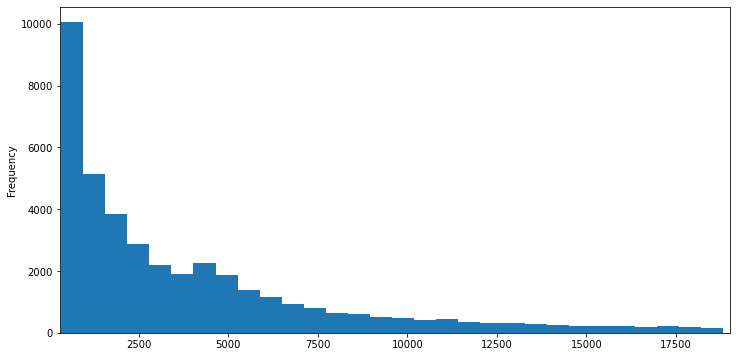

In [31]:
df_final['price'].plot(kind='hist', bins=30, xlim=(300, 19000), figsize=(12,6))

In [32]:
# Llegas a la concluisión que la distribución del precio no es Normal. Hay una rango muy amplio, siendo la moda un valor muy por debajo del valor mas alto.

In [33]:
df_final.describe()

,depth,table,x,y,z,carat,price,cut_category,color_category,clarity_category,city_category,volume
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,61.752841,57.446133,5.729392,5.732819,3.537154,0.797706,3928.444469,2.160376,3.160524,2.280658,5.643555,129.802259
std,1.431725,2.233535,1.124453,1.146650,0.697062,0.475544,3992.416147,1.705266,1.754621,1.937965,4.077632,78.903997
min,43.000000,43.000000,0.000000,0.000000,0.000000,0.200000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,56.000000,4.710000,4.720000,2.910000,0.400000,945.000000,0.000000,2.000000,1.000000,2.000000,64.889552
50%,61.800000,57.000000,5.690000,5.710000,3.520000,0.700000,2397.000000,2.000000,3.000000,2.000000,6.000000,114.689347
75%,62.500000,59.000000,6.540000,6.540000,4.035000,1.040000,5331.000000,4.000000,5.000000,3.000000,10.000000,170.844547
max,79.000000,95.000000,10.230000,58.900000,8.060000,4.500000,18823.000000,4.000000,6.000000,7.000000,12.000000,3840.598060


# CARAT

In [34]:
# Min Carat
df_final['carat'].min()

0.2

In [35]:
# Max carat
df_final['carat'].max()

4.5

In [36]:
# Media de Carat
df_final['carat'].mean()

0.7977055988134926

<AxesSubplot:ylabel='Frequency'>

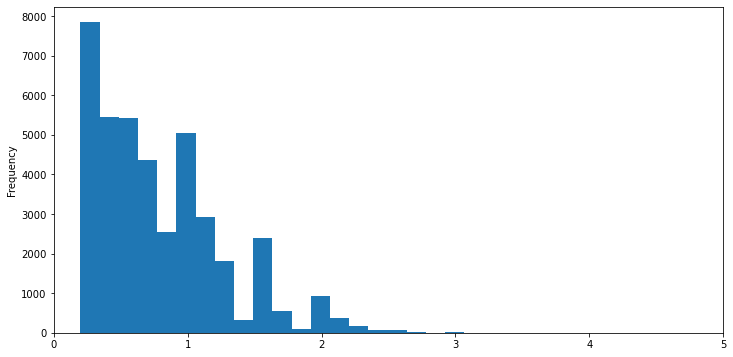

In [37]:
df_final['carat'].plot(kind='hist', bins=30, xlim=(0, 5), figsize=(12,6)) 

In [38]:
# La distribucion de carat no es normal.

# Price - Carat

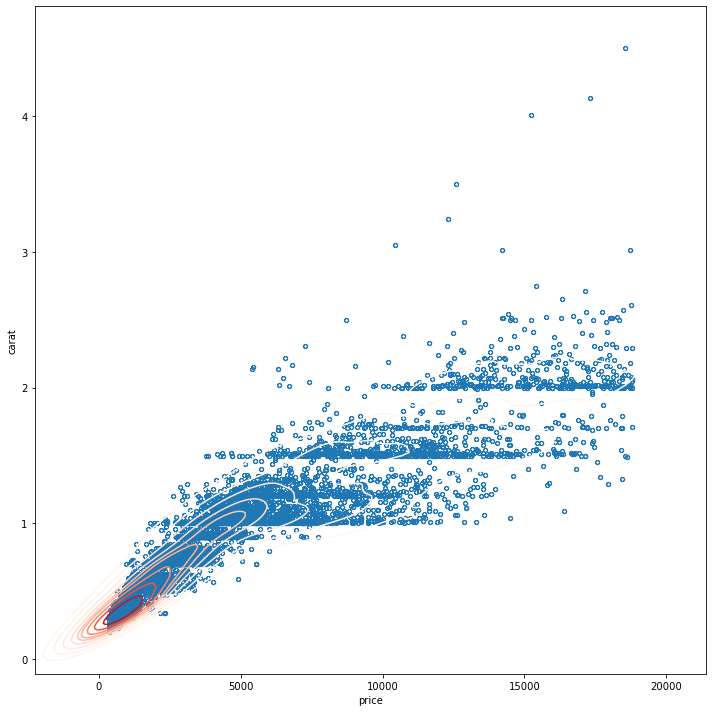

In [39]:
# Contour plot

fig, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(data=df_final.sample(10000),
            x='price',
            y='carat',
            ax=ax,
            cmap="Reds")
df_final.sample(10000).plot.scatter(x='price',
                                   y='carat',
                                   marker='$\u25EF$',
                                   alpha=1,
                                   ax=ax)
ax.set_xlabel('price')
ax.set_ylabel('carat')
plt.tight_layout()

In [40]:
# Relación lineal positiva. Se observa que el precio aumenta cuando aumenta carat

In [41]:
# Desviación estandar para comrobar la fiabilidad de los datos
print(df_final['carat'].std())
print(df_final['price'].std())

0.47554421532468527
3992.4161466170613


# VOLUME

In [42]:
df_final['volume'] =(df_final['x']*df_final['y']*df_final['z'])
df_final



C:\Users\abarr\AppData\Local\Temp\ipykernel_4600\3378609631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['volume'] =(df_final['x']*df_final['y']*df_final['z'])


,index_id,depth,table,x,y,z,color,clarity,city,cut,carat,price,cut_category,color_category,clarity_category,city_category,volume
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,J,VS2,Kimberly,Premium,1.21,4268,0,0,0,0,197.096725
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,H,VS2,Antwerp,Very Good,0.32,505,1,1,0,1,52.395750
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,G,VS1,London,Fair,0.71,2686,2,2,1,2,113.436890
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,D,SI1,New York City,Good,0.41,738,3,3,2,3,66.268800
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,G,SI1,Dubai,Ideal,1.02,4882,4,2,2,4,168.429975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43,G,VS1,New York City,Ideal,1.34,10070,4,2,1,3,221.429120
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73,F,SI2,Zurich,Good,2.02,12615,3,4,3,7,324.276975
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01,H,SI1,Tel Aviv,Ideal,1.01,5457,4,1,2,8,163.990554
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76,J,VS1,Paris,Ideal,0.33,456,4,0,1,12,54.900540


In [43]:
df_final.corr()

,depth,table,x,y,z,carat,price,cut_category,color_category,clarity_category,city_category,volume
depth,1.000000,-0.293114,-0.026348,-0.030966,0.094655,0.026528,-0.014864,0.103527,-0.022641,0.007993,-0.003479,0.006721
table,-0.293114,1.000000,0.196059,0.184673,0.155189,0.183392,0.130111,-0.487714,-0.000721,-0.033903,0.000382,0.168437
x,-0.026348,0.196059,1.000000,0.973712,0.984876,0.975688,0.885848,-0.159567,-0.094683,-0.070309,0.005391,0.952303
y,-0.030966,0.184673,0.973712,1.000000,0.964828,0.951667,0.866163,-0.147697,-0.092407,-0.067494,0.004291,0.977860
z,0.094655,0.155189,0.984876,0.964828,1.000000,0.967570,0.874500,-0.140370,-0.096091,-0.068326,0.005567,0.953983
carat,0.026528,0.183392,0.975688,0.951667,0.967570,1.000000,0.921935,-0.155484,-0.098452,-0.049621,0.005937,0.971851
price,-0.014864,0.130111,0.885848,0.866163,0.874500,0.921935,1.000000,-0.112130,-0.059397,-0.049588,0.003831,0.898684
cut_category,0.103527,-0.487714,-0.159567,-0.147697,-0.140370,-0.155484,-0.112130,1.000000,0.017064,0.055786,0.004741,-0.147425
color_category,-0.022641,-0.000721,-0.094683,-0.092407,-0.096091,-0.098452,-0.059397,0.017064,1.000000,-0.005929,-0.006199,-0.096211
clarity_category,0.007993,-0.033903,-0.070309,-0.067494,-0.068326,-0.049621,-0.049588,0.055786,-0.005929,1.000000,-0.002321,-0.048676


In [44]:
df_final['volume'].min()

0.0

In [45]:
df_final['volume'].max()

3840.5980600000003

In [46]:
df_final['volume'].std()

78.90399728688193

In [47]:
# Media volume
df_final['volume'].mean()

129.80225949284304

In [48]:
# Sacamos la medida de volume aproximada. x*y*z

# VOLUME - PRICE

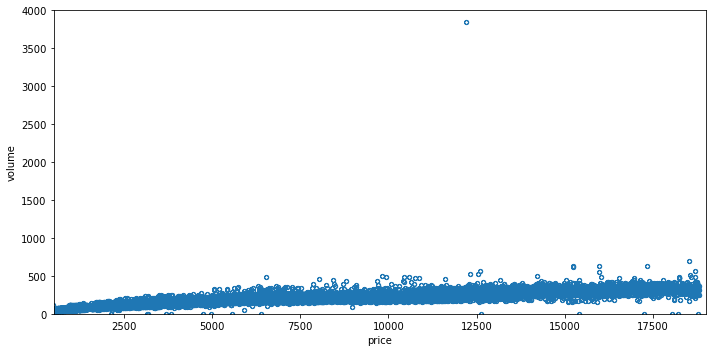

In [49]:

ax = df_final.plot.scatter(x='price', y='volume',
                          figsize=(10, 5),
                          marker='$\u25EF$',
                          alpha=1)
ax.set_xlabel('price')
ax.set_ylabel('volume')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)
plt.xlim([500, 19000])
plt.ylim([0, 4000])
plt.tight_layout()

In [50]:
# Desviación
df_final['volume_desv'] = df_final['volume'].mean() - df_final['volume']

print('Volume_deviation:', df_final['volume_desv'].sum())

df_final

Volume_deviation: -3.501736500766128e-08


C:\Users\abarr\AppData\Local\Temp\ipykernel_4600\1812603538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['volume_desv'] = df_final['volume'].mean() - df_final['volume']


,index_id,depth,table,x,y,z,color,clarity,city,cut,carat,price,cut_category,color_category,clarity_category,city_category,volume,volume_desv
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,J,VS2,Kimberly,Premium,1.21,4268,0,0,0,0,197.096725,-67.294466
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,H,VS2,Antwerp,Very Good,0.32,505,1,1,0,1,52.395750,77.406509
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,G,VS1,London,Fair,0.71,2686,2,2,1,2,113.436890,16.365369
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,D,SI1,New York City,Good,0.41,738,3,3,2,3,66.268800,63.533459
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,G,SI1,Dubai,Ideal,1.02,4882,4,2,2,4,168.429975,-38.627716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43,G,VS1,New York City,Ideal,1.34,10070,4,2,1,3,221.429120,-91.626861
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73,F,SI2,Zurich,Good,2.02,12615,3,4,3,7,324.276975,-194.474716
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01,H,SI1,Tel Aviv,Ideal,1.01,5457,4,1,2,8,163.990554,-34.188295
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76,J,VS1,Paris,Ideal,0.33,456,4,0,1,12,54.900540,74.901719


In [51]:
# Podemos afirmar que a medida que aumenta, lo hace tambien el precio.

# CUT - VOLUME

<AxesSubplot:title={'center':'CUT'}>

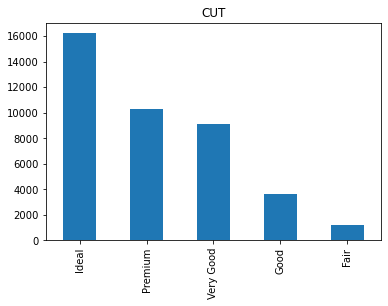

In [52]:
# Cantidad de tipos de cut

df_final['cut'].value_counts().plot(kind='bar',title='CUT')

# Hay mas cantidad de Ideal Cut

In [53]:
# VOLUME - PRICE - CUT
volume_price = df_final.groupby("cut")[["volume","price"]].mean()
volume_price

,volume,price
cut,,
Fair,165.089080,4333.271980
Good,135.428699,3880.611794
Ideal,114.959765,3436.112577
Premium,145.824334,4617.322612
Very Good,131.210183,3994.444420


In [54]:
# Observamos que cut no influye sobre el precio, pero volume si

# Volume - Carat

In [55]:
df_final['volume'].mean()


129.80225949284304

In [56]:
df_final['carat'].mean()

0.7977055988134926

In [57]:
df_vol_carat = df_final[["volume","carat", 'price']].sort_values(by='carat').reset_index(inplace=False)
df_vol_carat

,index,volume,carat,price
0,6423,32.291558,0.20,367
1,1582,32.262375,0.20,345
2,6550,33.269760,0.20,367
3,16597,34.091520,0.20,367
4,5157,32.396364,0.20,367
...,...,...,...,...
40450,2884,627.841214,4.00,15984
40451,3468,631.894380,4.01,15223
40452,23609,621.496512,4.01,15223
40453,27893,633.355000,4.13,17329


In [58]:
# Carat Volume - city
df_c =df_final.groupby("city")[["volume","price"]].mean()
df_c

,volume,price
city,,
Amsterdam,130.815058,3965.005503
Antwerp,129.196094,3896.202884
Dubai,130.380668,3950.424839
Kimberly,128.916098,3895.665675
Las Vegas,130.427653,3988.798280
London,130.290976,3908.619220
Luxembourg,130.857826,3975.403328
Madrid,129.541885,3930.299121
New York City,130.229079,3962.377154


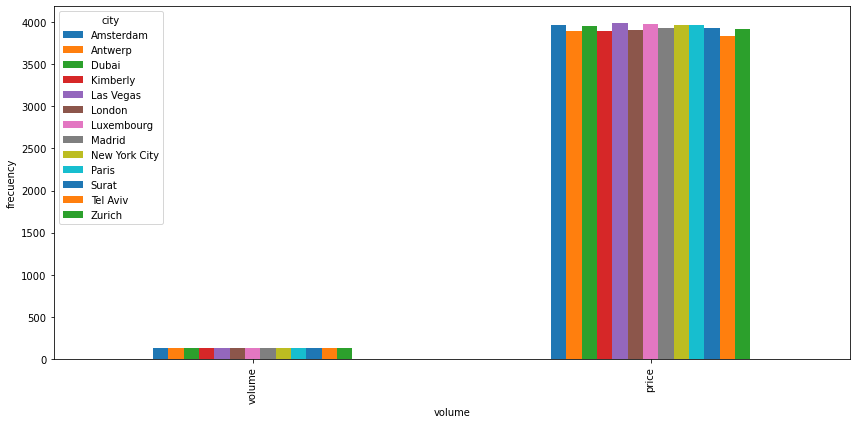

In [59]:

ax = df_c.transpose().plot.bar(figsize=(12, 6), legend=True)
ax.set_xlabel('volume')
ax.set_ylabel('frecuency')

plt.tight_layout()
plt.show()

In [ ]:
# Podemos afirmar que en todas las ciudades, la media del precio es la misma, asi como del tamaño del diamante. 
# En todas las ciudades, el precio del kilate del diamante es el mismo

# Color - Price

In [48]:
df_color = df_final[['color','price']].sort_values(by = 'color').reset_index()
df_color

,index,color,price
0,38439,D,1385
1,5616,D,3008
2,21147,D,462
3,36113,D,663
4,21151,D,1130
...,...,...,...
40450,25694,J,3926
40451,25695,J,1609
40452,25716,J,830
40453,25485,J,3326


In [49]:
# Tabla de contingencias
color = df_final.pivot_table(index=['city'],columns=['color'], aggfunc=lambda x: len(x))
color

carat                                clarity            ...  \
color             D    E    F     G    H    I    J       D    E    F  ...   
city                                                                  ...   
Amsterdam       296  482  459   516  411  256  124     296  482  459  ...   
Antwerp         624  907  928  1068  775  511  249     624  907  928  ...   
Dubai           293  430  444   550  387  234  150     293  430  444  ...   
Kimberly        624  933  925  1016  769  521  252     624  933  925  ...   
Las Vegas       324  461  431   576  368  253  145     324  461  431  ...   
London          292  459  411   550  375  261  139     292  459  411  ...   
Luxembourg      333  457  450   482  396  256  150     333  457  450  ...   
Madrid          314  448  470   526  369  227  150     314  448  470  ...   
New York City   341  469  431   480  434  223  117     341  469  431  ...   
Paris           334  451  449   516  419  267  143     334  451  449  ...   
Surat           611  902  852  1105  817  510  250     611  902  852  ...   
Tel Aviv        328  468  430   512  413  259  123     328  468  430  ...   
Zurich          335  458  497   558  344  254  148     335  458  497  ...   

                 y              z                                 
color            H    I    J    D    E    F     G    H    I    J  
city                                                              
Amsterdam      411  256  124  296  482  459   516  411  256  124  
Antwerp        775  511  249  624  907  928  1068  775  511  249  
Dubai          387  234  150  293  430  444   550  387  234  150  
Kimberly       769  521  252  624  933  925  1016  769  521  252  
Las Vegas      368  253  145  324  461  431   576  368  253  145  
London         375  261  139  292  459  411   550  375  261  139  
Luxembourg     396  256  150  333  457  450   482  396  256  150  
Madrid         369  227  150  314  448  470   526  369  227  150  
New York City  434  223  117  341  469  431   480  434  223  117  
Paris          419  267  143  334  451  449   516  419  267  143  
Surat          817  510  250  611  902  852  1105  817  510  250  
Tel Aviv       413  259  123  328  468  430   512  413  259  123  
Zurich         344  254  148  335  458  497   558  344  254  148  

[13 rows x 84 columns]

In [55]:
df_color.describe()


count       1.000000
mean     3928.444469
std              NaN
min      3928.444469
25%      3928.444469
50%      3928.444469
75%      3928.444469
max      3928.444469
dtype: float64